In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

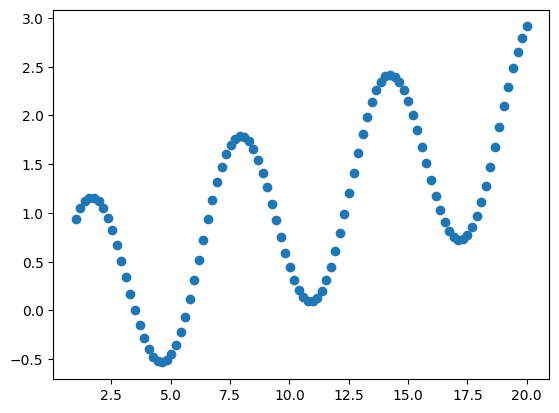

In [56]:
x = np.linspace(1,20,100)
y = np.sin(x) + 0.1 * np.linspace(1,20,100)
plt.scatter(x, y)

## Find parameter (d)

check if d value should be different than 0

In [80]:
# if p value is larger than significance level, the series needs to be differentiated
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.662702
p-value: 0.004669


check which d is needed - the right d value returns a flat Order Differencing Plot and a Autocorrelation Plot without large variance

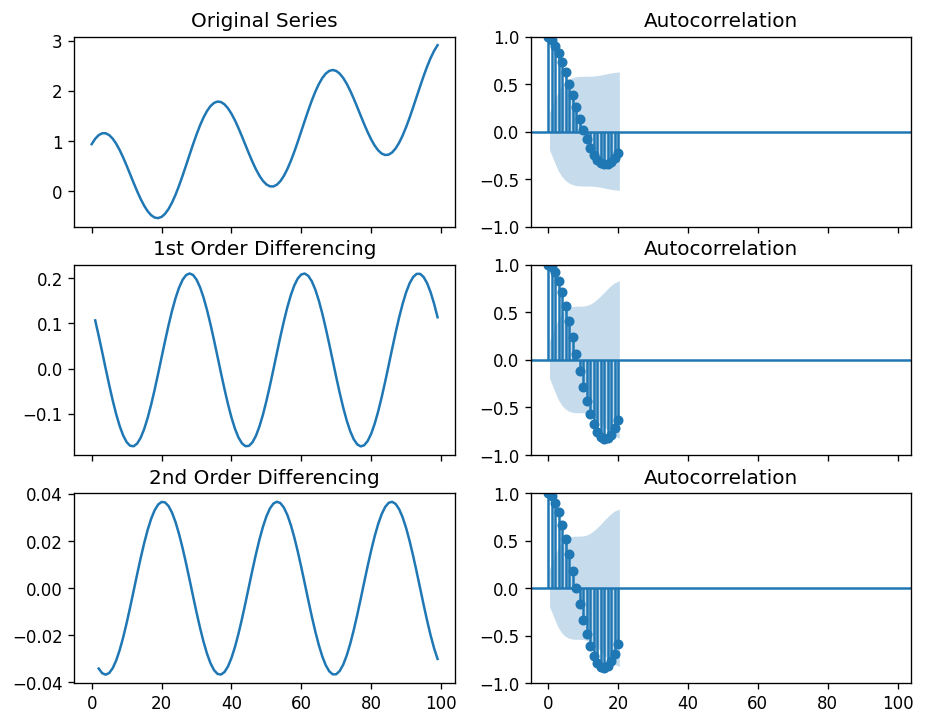

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

y = pd.DataFrame(y)
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

additional tests

In [83]:
from pmdarima.arima.utils import ndiffs
## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

c:\Users\piuscarbon\.conda\envs\kaggle\lib\site-packages\statsmodels\regression\linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


2

## Find the right value (p)

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series

The PACF plot shows on the right the Partial Autocorrelation. The number of dots above the significance niveau indicates the p value

c:\Users\piuscarbon\.conda\envs\kaggle\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


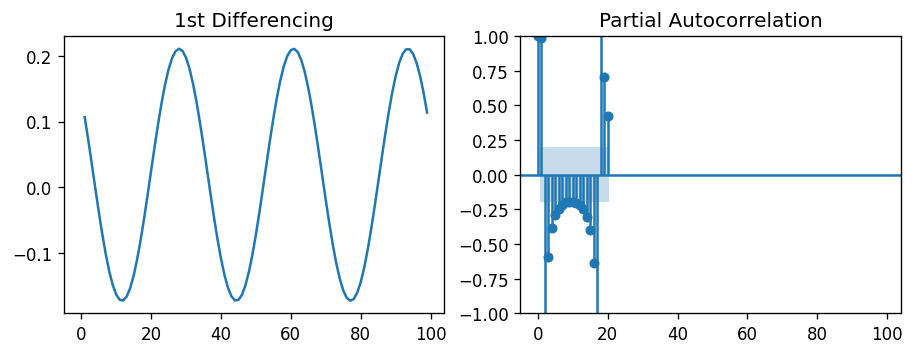

In [84]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y.diff().dropna(), ax=axes[1])

plt.show()

## Find the right value (q)

same approach as above with p: Choose q in a way that it equals the amount of points above the significance line

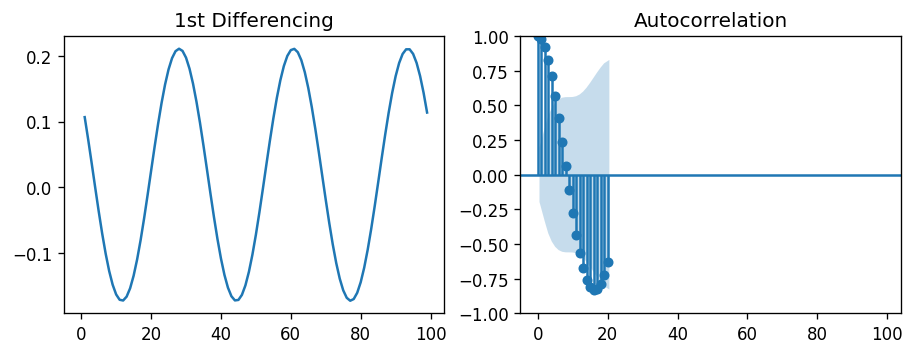

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y.diff().dropna(), ax=axes[1])

plt.show()

In [113]:
mod = ARIMA(endog=y, order=(2,2,5))
res = mod.fit()
print(res.summary())

c:\Users\piuscarbon\.conda\envs\kaggle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  100
Model:                 ARIMA(2, 2, 5)   Log Likelihood                 706.379
Date:                Fri, 16 Sep 2022   AIC                          -1396.758
Time:                        15:56:11   BIC                          -1376.079
Sample:                             0   HQIC                         -1388.394
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9436      0.003    639.777      0.000       1.938       1.950
ar.L2         -0.9820      0.004   -267.944      0.000      -0.989      -0.975
ma.L1       7.705e-05      0.000      0.450      0.6

c:\Users\piuscarbon\.conda\envs\kaggle\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


c:\Users\piuscarbon\.conda\envs\kaggle\lib\site-packages\statsmodels\regression\linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=347.571, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254.842, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.034 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                -125.421
Date:                Fri, 16 Sep 2022   AIC                            254.842
Time:                        15:08:32   BIC                         

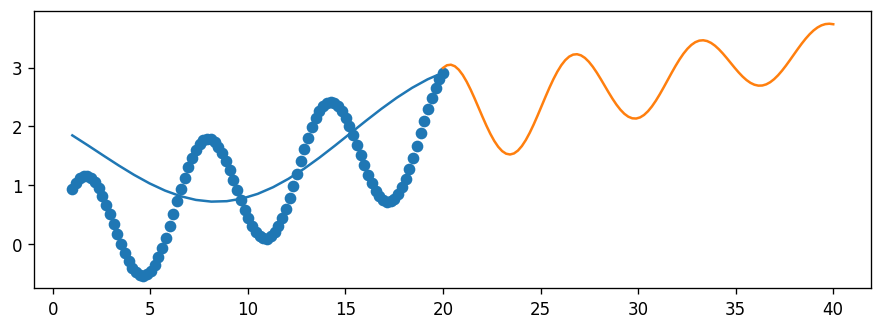

In [108]:
pred = res.predict(75)
forecast = res.forecast(100, alpha=0.05)  # 95% conf
plt.scatter(x, y)
plt.plot(np.linspace(1, 20, len(pred)), pred)
plt.plot(np.linspace(20, 40, len(forecast)), forecast)

## Evaluation

In [53]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax, "PRECISION": 1-mape})

In [117]:
forecast_accuracy(pred, y[3:].values.reshape(len(pred),))

ValueError: cannot reshape array of size 97 into shape (25,)

TypeError: 'int' object is not subscriptable

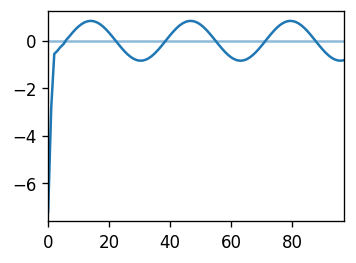

In [111]:
res.plot_diagnostics(figsize=(7,5))
plt.show()